## Final Project Submission

Please fill out:
* Student name: Sabina Bains
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL: 


In [1]:
# Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import statistics
import os

In [2]:
%matplotlib inline

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-talk')

Notes:

imdb variable explanation: https://www.imdb.com/interfaces/

In [3]:
#Viewing and changing filenames for easier file importing
filenames = os.listdir('zippedData')
paths = []

for file in filenames:
    paths.append('zippeddata/'+file)
    
for num, name in enumerate(paths):
    print(num, name)

0 zippeddata/imdb.title.crew.csv.gz
1 zippeddata/imdb.title.basics.tsv.gz
2 zippeddata/tmdb.movies.csv.gz
3 zippeddata/imdb.title.akas.csv.gz
4 zippeddata/imdb.title.ratings.csv.gz
5 zippeddata/imdb.name.basics.csv.gz
6 zippeddata/rt.reviews.tsv.gz
7 zippeddata/imdb.title.basics.csv.gz
8 zippeddata/rt.movie_info.tsv.gz
9 zippeddata/tn.movie_budgets.csv.gz
10 zippeddata/bom.movie_gross.csv.gz
11 zippeddata/imdb.title.principals.csv.gz


#  1: TOP GENRES BY MEDIAN PROFIT

### TO DO:
- Add labels to graph?
- make labels in charts bigger
- change color of boxplot / decide if we want to use median bar chart or boxplot
- make function to pull top movies better with formatted values?
- DELETE THE /N

In [8]:
#importing profit dataset
profit = pd.read_csv(paths[9])

In [9]:
# Importing Genre Data and Filtering on Type = Movie
genres = pd.read_csv(paths[1],sep="\t",low_memory=False)
genres = genres.loc[genres['titleType']=='movie']

In [10]:
# grabbing year only from release_date for merge
profit['startYear'] = profit['release_date'].map(lambda x : x[-4:])
profit.rename(columns={'movie':'primaryTitle'}, inplace=True)

In [11]:
# merging on movie title and year release 
merge_list=['primaryTitle','startYear']
f = pd.merge(genres,profit,on=merge_list,how='inner')

In [294]:
# Removing , and $ from dollar columns to turn into type int
f_dollar_cols = ['production_budget', 'domestic_gross','worldwide_gross']
for i in f_dollar_cols:
    f[i]=f[i].str.replace('$','')
    f[i]=f[i].str.replace(',','').astype(int)
f['profit']=f['worldwide_gross']-f['production_budget']

AttributeError: Can only use .str accessor with string values!

In [13]:
f.sort_values(by='profit',ascending=False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
2491,tt0499549,movie,Avatar,Avatar,0,2009,\N,162,"Action,Adventure,Fantasy",1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279
939,tt0120338,movie,Titanic,Titanic,0,1997,\N,194,"Drama,Romance",43,"Dec 19, 1997",200000000,659363944,2208208395,2008208395
4110,tt4154756,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018,\N,149,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200
1987,tt0369610,movie,Jurassic World,Jurassic World,0,2015,\N,124,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864
3890,tt2820852,movie,Furious 7,Fast & Furious 7,0,2015,\N,137,"Action,Adventure,Thriller",67,"Apr 3, 2015",190000000,353007020,1518722794,1328722794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,tt5519340,movie,Bright,Bright,0,2017,\N,117,"Action,Fantasy,Thriller",80,"Dec 13, 2017",90000000,0,0,-90000000
1263,tt0180052,movie,The Adventures of Pluto Nash,The Adventures of Pluto Nash,0,2002,\N,95,"Action,Comedy,Sci-Fi",5,"Aug 16, 2002",100000000,4411102,7094995,-92905005
1117,tt0141907,movie,Town & Country,Town & Country,0,2001,\N,104,"Comedy,Romance",53,"Apr 27, 2001",105000000,6712451,10364769,-94635231
3737,tt2283336,movie,Men in Black: International,Men in Black: International,0,2019,\N,114,"Action,Adventure,Comedy",42,"Jun 14, 2019",110000000,3100000,3100000,-106900000


In [14]:
#Creating Deduplicated list of Genres to use as Keys for Dictionary
genre_list = f.genres.str.split(',').to_list()
genre_list = list(set(list(chain.from_iterable(genre_list))))

In [15]:
#creating dictionary to map ratings to genres
val_dict={}
for item in genre_list:
    val_dict[item] = []

In [16]:
for index, row in f.iterrows():
    for genre in val_dict:
        if genre in row['genres']:
            val_dict[genre].append(row['profit'])

In [17]:
# calculating count of movies in each genre (as we should exclude genre if it doesn't have many movies represented)
count_dict = val_dict.copy()

for i in count_dict:
    count_dict[i] = len(count_dict[i])

In [18]:
# calculating average rating per Genre
median_val_dict = {}
for i in val_dict:
    median_val_dict[i] = statistics.median(val_dict[i])

In [19]:
#creating df from ratings column from dictionary
profit_by_genre = pd.DataFrame(median_val_dict,index=['Median Profit'])
profit_by_genre = profit_by_genre.transpose()
profit_by_genre = profit_by_genre.reset_index()
profit_by_genre.head()

,index,Median Profit
0,Adult,44975000.0
1,Romance,10376506.0
2,Reality-TV,-1000000.0
3,Sci-Fi,33560769.5
4,Documentary,1459120.5


In [20]:
#creating df with count column from dictionary
count_by_genre = pd.DataFrame(count_dict,index=['Count'])
count_by_genre = count_by_genre.transpose()
count_by_genre = count_by_genre.reset_index()
count_by_genre.head()

,index,Count
0,Adult,1
1,Romance,695
2,Reality-TV,1
3,Sci-Fi,366
4,Documentary,94


In [21]:
# final merge onto genre column for analysis
genre = pd.merge(profit_by_genre,count_by_genre, on="index")
genre.rename(columns={'index':'Genre'},inplace=True)
genre.head()

,Genre,Median Profit,Count
0,Adult,44975000.0,1
1,Romance,10376506.0,695
2,Reality-TV,-1000000.0,1
3,Sci-Fi,33560769.5,366
4,Documentary,1459120.5,94


In [22]:
# filtering out any genre column that has less than 10 movies represented and sorting by highest rating
genre = genre.loc[genre['Count'] >= 10].reset_index(drop=True)
genre = genre.sort_values('Median Profit', ascending = False)

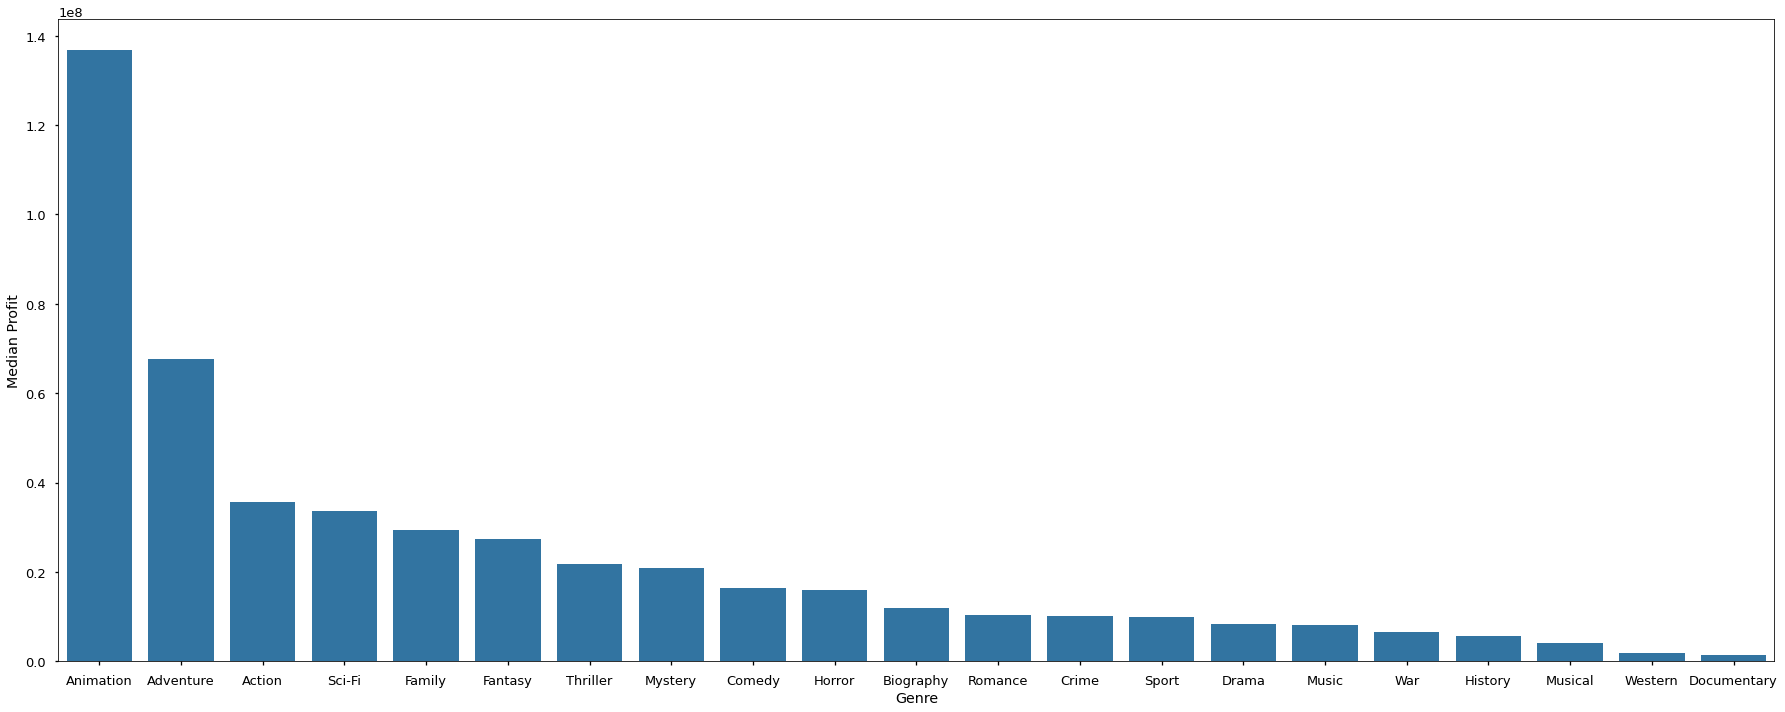

In [23]:
# Bar Plot of Ratings by Genre
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x = 'Genre',
            y = 'Median Profit',
            data = genre,
            ax = ax,
            color = 'tab:blue')
fig.tight_layout()

In [24]:
def top_in_genre(genre):
    cols=['primaryTitle', 'release_date',
       'runtimeMinutes','genres',
       'production_budget','worldwide_gross', 'profit']
    df = f[cols]
    df = df.loc[df['genres'].str.contains(genre)]
    df = df.sort_values(by='profit',ascending=False).head(5)
    return df

In [39]:
# Turning Ratings Dict into DF for Boxplot
profit_genre_df = pd.DataFrame.from_dict(val_dict, orient = "index").sort_index().stack().reset_index(level=1, drop=True).reset_index()
profit_genre_df.columns = ['Genre','Median Profit (in Billions)']
# profit_genre_df.sort_values(by='Median Profit (in Billions)',ascending=False)

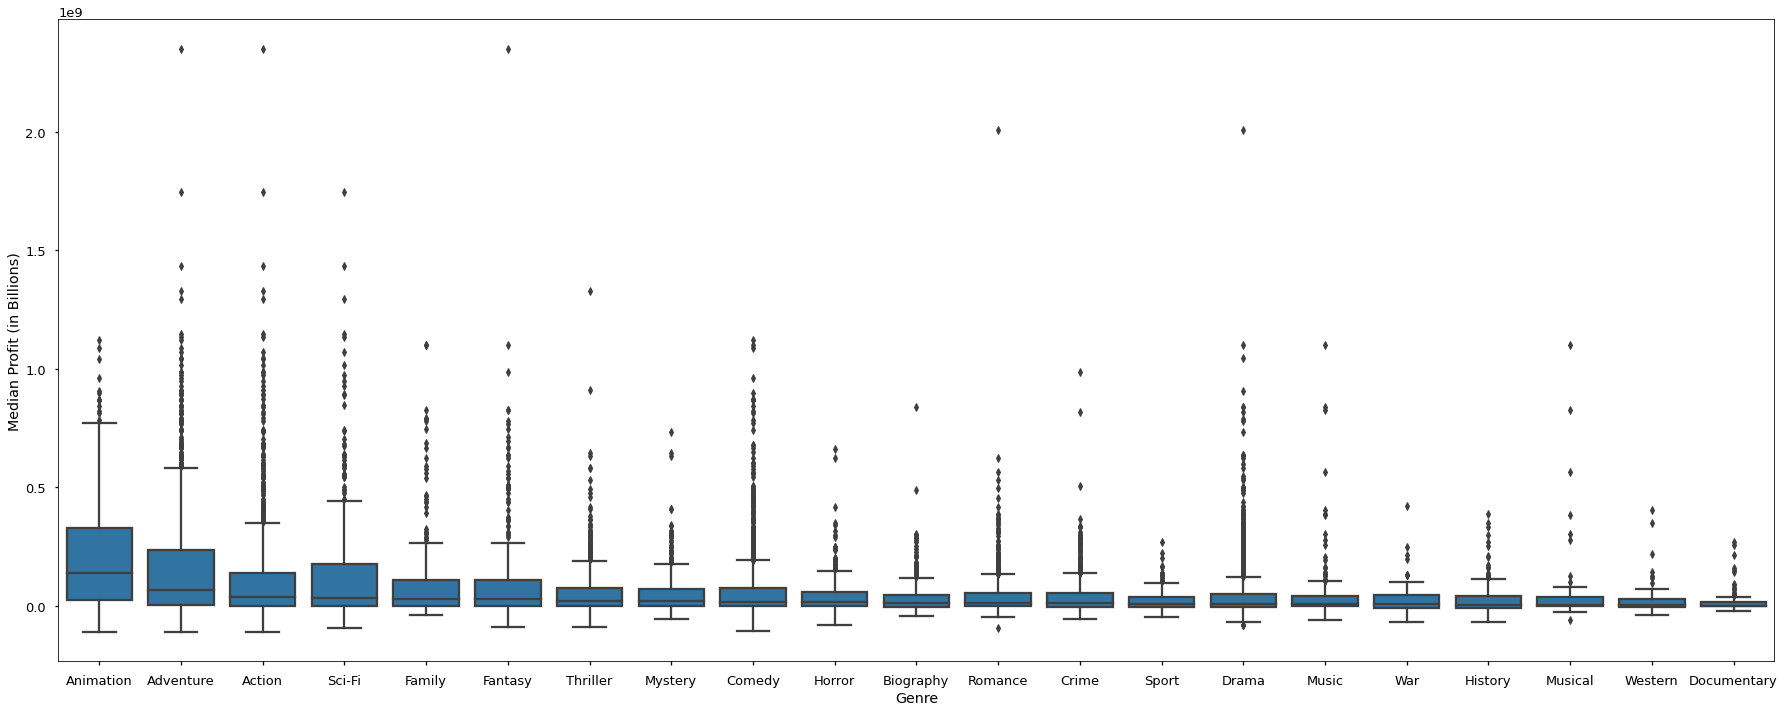

In [34]:
# Boxplot of Ratings by Genre
fig, ax = plt.subplots(figsize=(25,10))
# ax = sns.boxplot(x='Genre', y="Median Profit (in Billions)", data=profit_genre_df, order=genre['Genre'].tolist())


sns.boxplot(x = 'Genre',
            y = 'Median Profit (in Billions)',
            data = profit_genre_df,
            ax = ax,
            color = 'tab:blue',
            order=genre['Genre'].tolist())
fig.tight_layout()

In [27]:
top_in_genre('Family')

,primaryTitle,release_date,runtimeMinutes,genres,production_budget,worldwide_gross,profit
2942,Beauty and the Beast,"Mar 17, 2017",129,"Family,Fantasy,Musical",160000000,1259199706,1099199706
2941,Beauty and the Beast,"Mar 17, 2017",\N,"Comedy,Drama,Family",160000000,1259199706,1099199706
2756,Alice in Wonderland,"Mar 5, 2010",108,"Adventure,Family,Fantasy",200000000,1025491110,825491110
2005,Harry Potter and the Order of the Phoenix,"Jul 11, 2007",138,"Action,Adventure,Family",150000000,943076457,793076457
3933,The Jungle Book,"Apr 15, 2016",106,"Adventure,Drama,Family",175000000,962854547,787854547


# SUGGESTION 2 

#don't need the region when merging with profit since they are all US, can skip the beginning merge

In [162]:
#read in data, merge together
namebasics = pd.read_csv(paths[5])
titleps = pd.read_csv(paths[11])
crew = pd.merge(titleps,namebasics,on='nconst',how='left')
#merge with financial data
fcrew = pd.merge(crew,f,on='tconst',how='inner')

In [182]:
#keep certain cols
crew_cols = ['category','tconst','primary_name','characters','primaryTitle','release_date',
            'production_budget','worldwide_gross','profit']
fcrew = fcrew[crew_cols]

In [183]:
fcrew['category'].unique()

array(['cinematographer', 'actor', 'director', 'producer', 'composer',
       'actress', 'writer', 'editor', 'production_designer', 'self',
       'archive_footage', 'archive_sound'], dtype=object)

In [191]:
a_list = ['actor','actress']
d_list = ['production_designer']
actor = fcrew.loc[fcrew['category'].isin(d_list)]

In [192]:
actor = actor.groupby('primary_name')['profit'].agg(['mean','count']).reset_index()
actor.sort_values('mean',ascending=False,inplace=True)

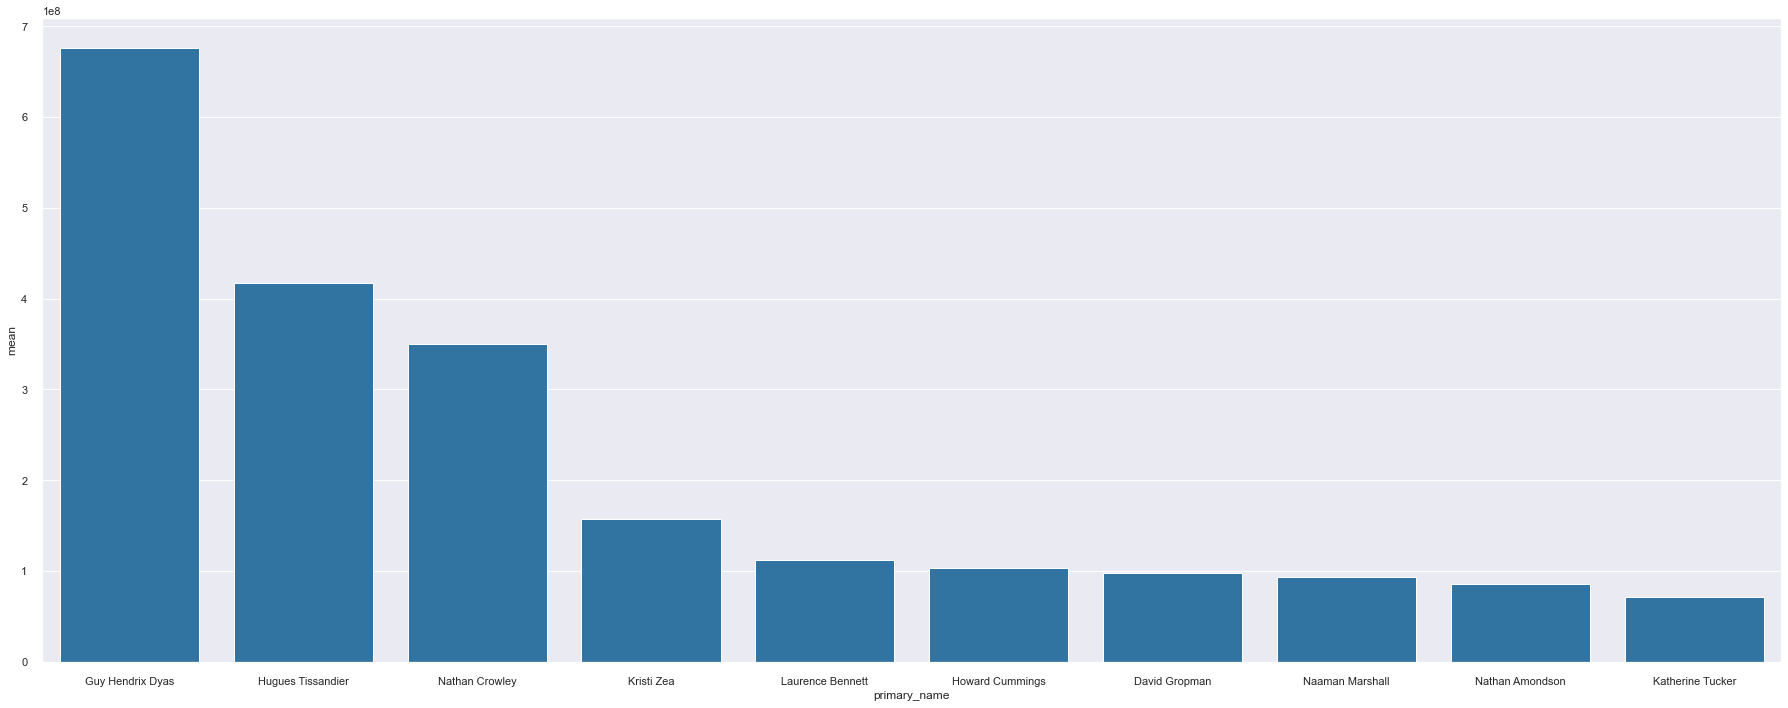

In [195]:
# Bar Plot of Ratings by Genre
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x = 'primary_name',
            y = 'mean',
            data = actor.head(10),
            ax = ax,
            color = 'tab:blue')
fig.tight_layout()

In [197]:
fcrew.loc[fcrew['primary_name']=='Guy Hendrix Dyas']

,category,tconst,primary_name,characters,primaryTitle,release_date,production_budget,worldwide_gross,profit
7686,production_designer,tt1375666,Guy Hendrix Dyas,NaN,Inception,"Jul 16, 2010",160000000,835524642,675524642


# budget vs. gross?

In [315]:
test = f.copy()
test_cols=['tconst','production_budget','worldwide_gross','profit']
test=test[test_cols]

In [316]:
test.sort_values(by='profit', inplace=True)

In [317]:
test.head()

,tconst,production_budget,worldwide_gross,profit
3083,tt1305591,150000000,39549758,-110450242
3737,tt2283336,110000000,3100000,-106900000
1117,tt0141907,105000000,10364769,-94635231
1263,tt0180052,100000000,7094995,-92905005
4230,tt5519340,90000000,0,-90000000


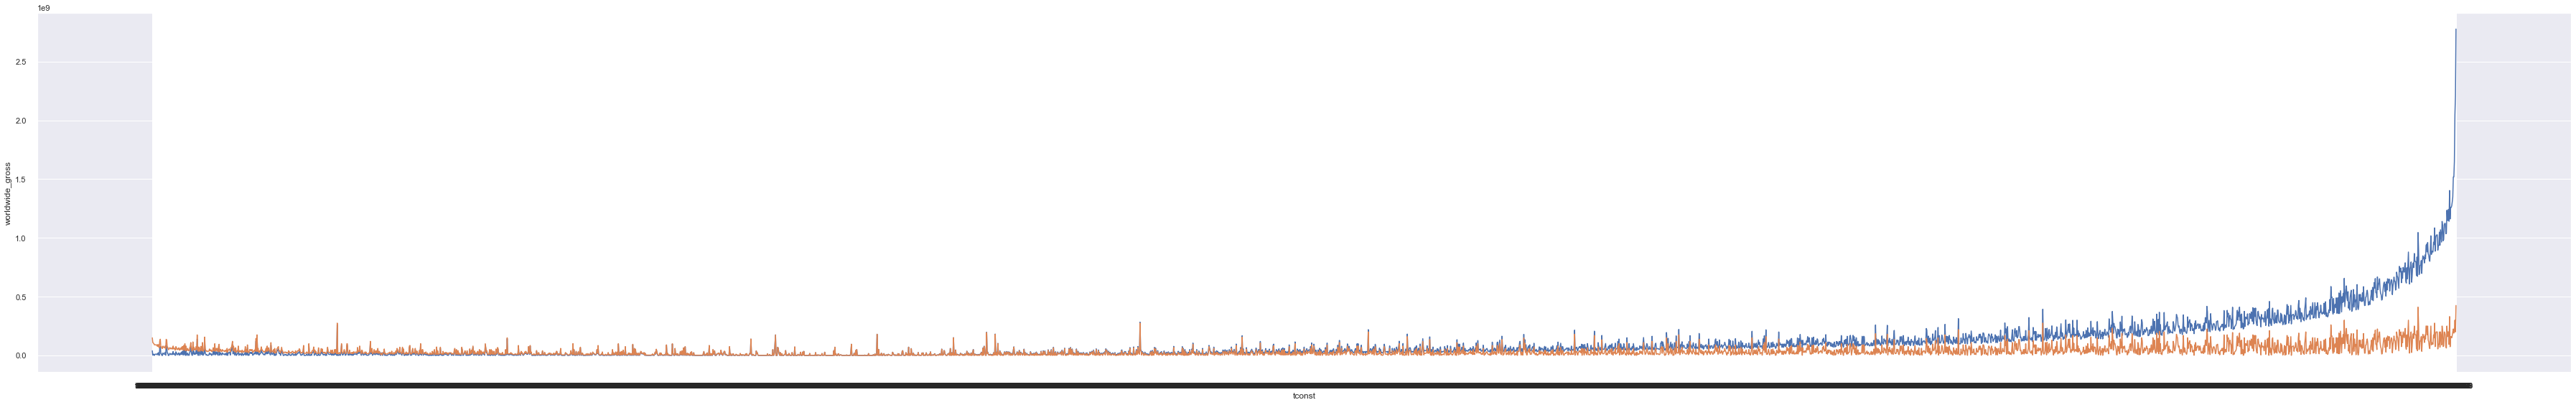

In [326]:
fig, ax = plt.subplots(figsize=(50,8))

x = test['tconst']
y = test['worldwide_gross']
y2 = test['production_budget']
sns.lineplot(x=x,y=y, err_style=None, ax=ax)
sns.lineplot(x=x,y=y2, err_style=None, ax=ax)
fig.tight_layout()

## Trying some stuff out 

In [267]:
# f['runtimeMinutes'].unique()
time=f.copy()
time = time.groupby('runtimeMinutes')['profit'].agg(['median','count']).reset_index()

In [280]:
time.sort_values(by='runtimeMinutes', inplace=True)

In [281]:
time.head()

,runtimeMinutes,median,count
0,100,10314989.5,118
1,101,14600000.0,115
2,102,10521524.0,90
3,103,10766000.0,75
4,104,16438538.0,103


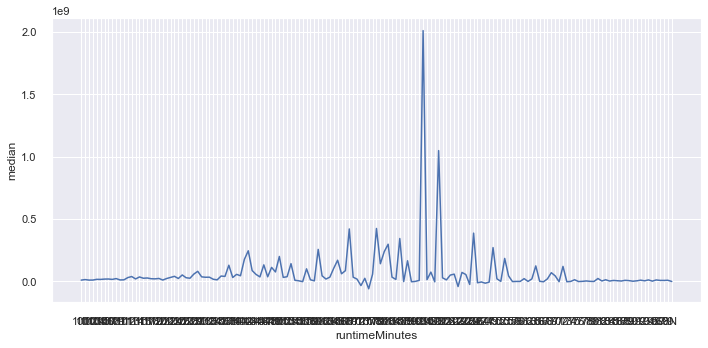

In [314]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=time,x='runtimeMinutes',y='median',ax=ax)
fig.tight_layout()

In [296]:
year=f.copy()
year = year.groupby('startYear')['profit'].agg(['median','count']).reset_index()
year.sort_values(by='startYear', inplace=True)

In [307]:
year

,startYear,median,count
0,1915,10890000.0,1
1,1916,-385907.0,1
2,1920,2900000.0,1
3,1925,13427500.0,2
4,1927,-2000000.0,1
...,...,...,...
90,2015,11190831.0,203
91,2016,25493506.0,165
92,2017,42929666.0,123
93,2018,40885196.0,121


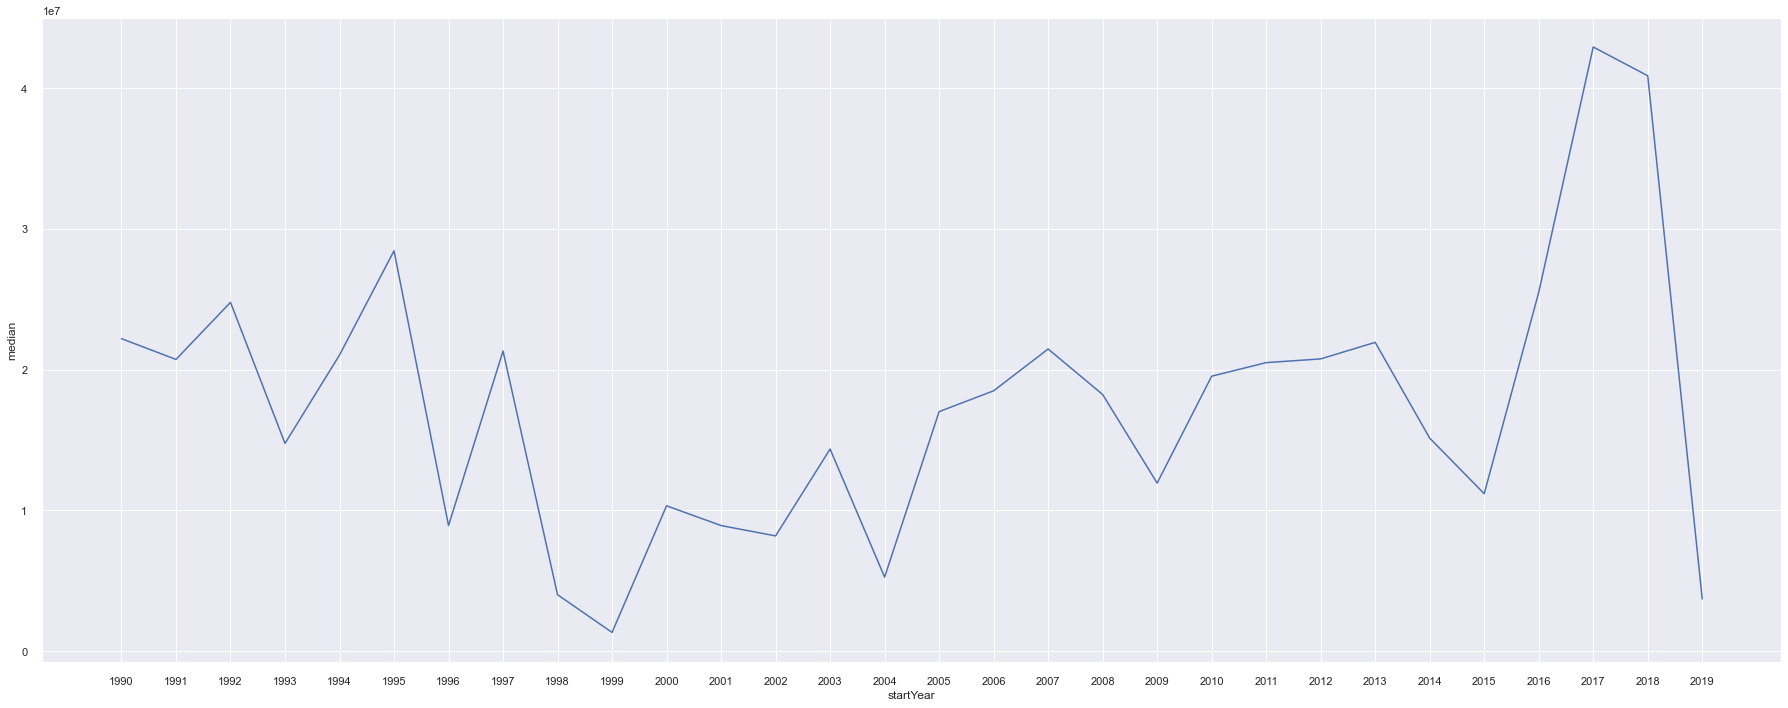

In [310]:
fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(data=year.tail(30),x='startYear',y='median',ax=ax)
fig.tight_layout()

In [305]:
f.sort_values(by='profit', ascending = False).head(30)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
2491,tt0499549,movie,Avatar,Avatar,0,2009,\N,162,"Action,Adventure,Fantasy",1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279
939,tt0120338,movie,Titanic,Titanic,0,1997,\N,194,"Drama,Romance",43,"Dec 19, 1997",200000000,659363944,2208208395,2008208395
4110,tt4154756,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018,\N,149,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200
1987,tt0369610,movie,Jurassic World,Jurassic World,0,2015,\N,124,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864
3890,tt2820852,movie,Furious 7,Fast & Furious 7,0,2015,\N,137,"Action,Adventure,Thriller",67,"Apr 3, 2015",190000000,353007020,1518722794,1328722794
2617,tt0848228,movie,The Avengers,The Avengers,0,2012,\N,143,"Action,Adventure,Sci-Fi",27,"May 4, 2012",225000000,623279547,1517935897,1292935897
3516,tt1825683,movie,Black Panther,Black Panther,0,2018,\N,134,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",200000000,700059566,1348258224,1148258224
4193,tt4881806,movie,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,0,2018,\N,128,"Action,Adventure,Sci-Fi",13,"Jun 22, 2018",170000000,417719760,1305772799,1135772799
3742,tt2294629,movie,Frozen,Frozen,0,2013,\N,102,"Adventure,Animation,Comedy",56,"Nov 22, 2013",150000000,400738009,1272469910,1122469910
2942,tt2771200,movie,Beauty and the Beast,Beauty and the Beast,0,2017,\N,129,"Family,Fantasy,Musical",35,"Mar 17, 2017",160000000,504014165,1259199706,1099199706
